# QTL functional enrichment
- GREAT, GO terms, etc.
- torus (GTEx)

## GREAT
ALL top cis-eQTL

In [1]:
suppressMessages(library(rGREAT))
suppressMessages(library(data.table))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))

In [3]:
eqtl <- fread("~/project-gandalm/isoform_twas/sLDSC/data/mixed_top_eqtl.txt", data.table = F, header = F)
coord <- fread("~/project-gandalm/isoform_twas/sLDSC/data/mixed_variant_coord.tsv", data.table = F, header = T)
bed <- eqtl %>% left_join(coord, by=c("V1"="GENE")) %>% select(CHR, START, END)
bed$CHR <- gsub('^','chr',bed$CHR)
# submit to GREAT
job <- submitGreatJob(bed, species = "hg19") # TODO: check options
tb <- getEnrichmentTables(job)

Warning message in submitGreatJob(bed, species = "hg19"):
“GREAT gives a warning:
Your set hits a large fraction of the genes in the genome, which often
does not work well with the GREAT Significant by Both view due to a
saturation of the gene-based hypergeometric test.

See our tips for handling large datasets or try the Significant By
Region-based Binomial view.”


In [4]:
names(tb)
job
availableOntologies(job)
availableCategories(job)

[1] "GO Molecular Function" "GO Biological Process" "GO Cellular Component"

Submit time: 2021-08-06 13:47:18 
Version: 4.0.4 
Species: hg19 
Inputs: 9702 regions
Background: wholeGenome 
Model: Basal plus extension 
  Proximal: 5 kb upstream, 1 kb downstream,
  plus Distal: up to 1000 kb
Include curated regulatory domains

Enrichment tables for following ontologies have been downloaded:
  GO Biological Process
  GO Cellular Component
  GO Molecular Function


[1] "GO Molecular Function"     "GO Biological Process"    
[3] "GO Cellular Component"     "Mouse Phenotype"          
[5] "Mouse Phenotype Single KO" "Human Phenotype"          
[7] "Ensembl Genes"

[1] "GO"        "Phenotype" "Genes"

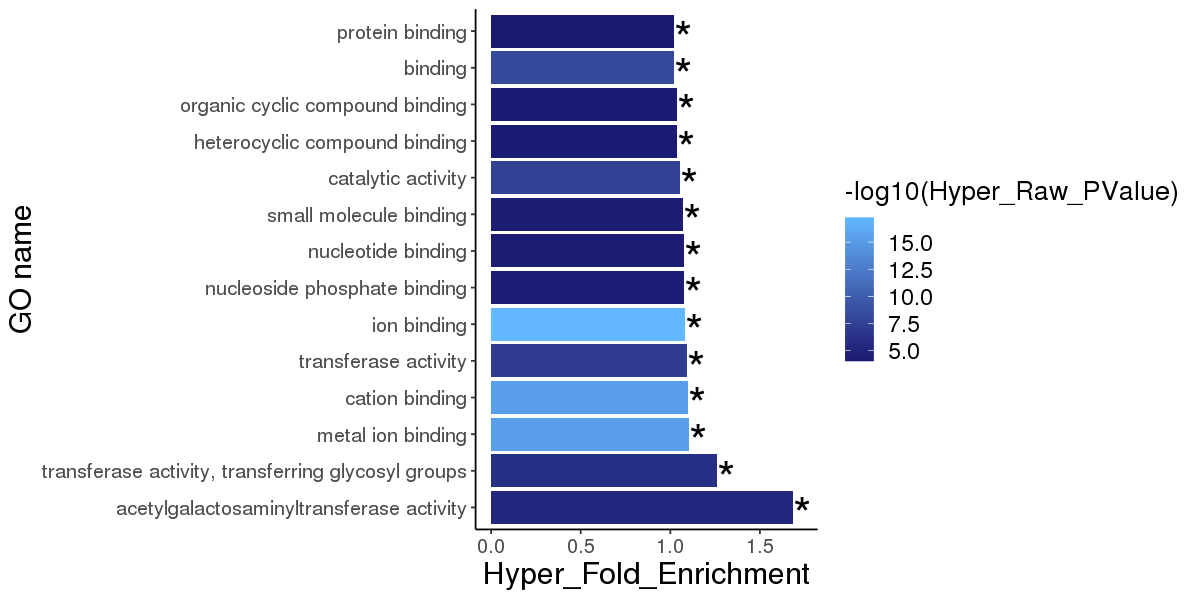

In [31]:
# GO Molecular Function
dat_mf <- tb[["GO Molecular Function"]] %>% filter(Hyper_Adjp_BH < 0.05)
label_df <- data.frame(name = dat_mf$name,
                       Hyper_Fold_Enrichment = dat_mf$Hyper_Fold_Enrichment+.05)
# TODO: which variables to use/plot?
options(repr.plot.height = 5, repr.plot.width = 10)
p <- ggplot(dat_mf, aes(y = Hyper_Fold_Enrichment, x = reorder(name, -Hyper_Fold_Enrichment))) +
  geom_bar(stat = "identity", aes(fill = -log10(Hyper_Raw_PValue))) +
  coord_flip() +
  theme_classic() +
  scale_fill_gradient(low = "midnightblue", high = "steelblue1", name = "-log10(Hyper_Raw_PValue)") +
  geom_text(data = label_df, label = "*", color = "black", size = 10, nudge_x = -.2) +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 18),
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)) +
  labs(x = "GO name")
p

## Ensembl Regulatory Build (GTEx, torus)

In [2]:
# all <- fread("/u/project/gandalm/shared/refGenomes/ensembl_regulatory_build/homo_sapiens.GRCh38.Regulatory_Build.regulatory_features.20210107.gff.gz", data.table = F, header = F)
# brain <- fread("/u/project/gandalm/shared/refGenomes/ensembl_regulatory_build/homo_sapiens.GRCh38.brain_1.Regulatory_Build.regulatory_activity.20210107.gff.gz", data.table = F, header = F)
all <- fread("/u/project/gandalm/shared/refGenomes/ensembl_regulatory_build/homo_sapiens.GRCh37.Regulatory_Build.regulatory_features.20201218.gff.gz", data.table = F, header = F)

In [8]:
dim(all)
# dim(brain)
head(all)
# head(brain)

[1] 599404      9

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,GL000191.1,Regulatory_Build,open_chromatin_region,101295,101509,.,.,.,ID=open_chromatin_region:ENSR00002093585;bound_end=101509;bound_start=101295;description=Open chromatin region;feature_type=Open chromatin
2,GL000191.1,Regulatory_Build,open_chromatin_region,24940,25470,.,.,.,ID=open_chromatin_region:ENSR00002093576;bound_end=25470;bound_start=24940;description=Open chromatin region;feature_type=Open chromatin
3,GL000191.1,Regulatory_Build,open_chromatin_region,34437,34739,.,.,.,ID=open_chromatin_region:ENSR00002093578;bound_end=34739;bound_start=34437;description=Open chromatin region;feature_type=Open chromatin
4,GL000191.1,Regulatory_Build,open_chromatin_region,56485,56718,.,.,.,ID=open_chromatin_region:ENSR00002093579;bound_end=56718;bound_start=56485;description=Open chromatin region;feature_type=Open chromatin
5,GL000191.1,Regulatory_Build,open_chromatin_region,78957,79628,.,.,.,ID=open_chromatin_region:ENSR00001469908;bound_end=79628;bound_start=78957;description=Open chromatin region;feature_type=Open chromatin
6,GL000191.1,Regulatory_Build,open_chromatin_region,85487,85911,.,.,.,ID=open_chromatin_region:ENSR00002093581;bound_end=85911;bound_start=85487;description=Open chromatin region;feature_type=Open chromatin


In [9]:
table(all$V3)
# table(brain$V3)
table(all$V1)
table(all$V2)


       CTCF_binding_site                 enhancer    open_chromatin_region 
                  172199                   163595                    86609 
                promoter promoter_flanking_region          TF_binding_site 
                   32667                   115347                    28987 


         1         10         11         12         13         14         15 
     52219      28618      28662      28340      17241      18460      19251 
        16         17         18         19          2         20         21 
     18382      21241      14817      14091      50934      15841       7174 
        22          3          4          5          6          7          8 
     10071      40951      33346      35754      34880      33062      29106 
         9 GL000191.1 GL000192.1 GL000193.1 GL000194.1 GL000195.1 GL000196.1 
     25858         17         81         17         26         73          4 
GL000197.1 GL000198.1 GL000199.1 GL000200.1 GL000201.1 GL000202.1 GL000203.1 
         5         17         16          8          5          9          1 
GL000204.1 GL000205.1 GL000206.1 GL000208.1 GL000209.1 GL000210.1 GL000211.1 
         7         49          9         41         12          3         13 
GL000212.1 GL000213.1 GL000214.1 GL000215.1 GL000216.1 GL000217


Regulatory_Build 
          599404 

In [3]:
coord <- fread("~/project-gandalm/isoform_twas/sLDSC/data/mixed_variant_coord.tsv", data.table = F, header = T)
head(coord)

,GENE,CHR,START,END
,<chr>,<int>,<int>,<dbl>
1,rs61769339,1,662622,662623
2,rs200188737,1,666249,666250
3,rs12238997,1,693731,693732
4,rs61769351,1,693823,693824
5,rs142559957,1,704637,704638
6,rs142576295,1,708075,708076


In [10]:
table(coord$CHR)


     1      2      3      4      5      6      7      8      9     10     11 
657497 716400 614737 617630 556538 552404 486082 479153 368072 419673 406773 
    12     13     14     15     16     17     18     19     20     21     22 
403606 304857 274312 247117 262975 216999 248723 190125 195058  94603 106872 

In [4]:
all <- all %>% filter(V1 %in% c(1:22))

In [5]:
coord$CTCF_binding_site_d <- coord$enhancer_d <- coord$open_chromatin_region_d <- coord$promoter_d <- coord$promoter_flanking_region_d <- coord$TF_binding_site_d <- 0

In [6]:
for(i in 1:nrow(coord)) {
    temp <- all %>% filter(V1 == coord[i,'CHR'], V4 <= coord[i,'START'], V5 >= coord[i,'START'])
    if('TF_binding_site' %in% temp$V3){
        coord[i,'TF_binding_site_d'] <- 1
    }
    if('promoter_flanking_region' %in% temp$V3){
        coord[i,'promoter_flanking_region_d'] <- 1
    }
    if('promoter' %in% temp$V3){
        coord[i,'promoter_d'] <- 1
    }
    if('open_chromatin_region' %in% temp$V3){
        coord[i,'open_chromatin_region_d'] <- 1
    }
    if('enhancer' %in% temp$V3){
        coord[i,'enhancer_d'] <- 1
    }
    if('CTCF_binding_site' %in% temp$V3){
        coord[i,'CTCF_binding_site_d'] <- 1
    }
}

In [7]:
head(coord)

,GENE,CHR,START,END,TF_binding_site_d,promoter_flanking_region_d,promoter_d,open_chromatin_region_d,enhancer_d,CTCF_binding_site_d
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs61769339,1,662622,662623,0,1,0,0,0,0
2,rs200188737,1,666249,666250,0,1,0,0,0,0
3,rs12238997,1,693731,693732,0,0,0,0,0,0
4,rs61769351,1,693823,693824,0,0,0,0,0,0
5,rs142559957,1,704637,704638,0,0,0,0,0,0
6,rs142576295,1,708075,708076,0,0,0,0,0,0


In [10]:
range(coord$END-coord$START)

[1] 1 1

In [11]:
annot <- coord %>% select(-c(2:4))
head(annot)

,GENE,TF_binding_site_d,promoter_flanking_region_d,promoter_d,open_chromatin_region_d,enhancer_d,CTCF_binding_site_d
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs61769339,0,1,0,0,0,0
2,rs200188737,0,1,0,0,0,0
3,rs12238997,0,0,0,0,0,0
4,rs61769351,0,0,0,0,0,0
5,rs142559957,0,0,0,0,0,0
6,rs142576295,0,0,0,0,0,0


In [12]:
gtex <- fread("~/project-gandalm/isoform_twas/gtex/WGS_Feature_overlap_collapsed_VEP_short_4torus.MAF01.txt", data.table = F)

In [13]:
head(gtex)

,SNP,enhancer_d,promoter_d,open_chromatin_region_d,promoter_flanking_region_d,CTCF_binding_site_d,TF_binding_site_d,3_prime_UTR_variant_d,5_prime_UTR_variant_d,frameshift_variant_d,intron_variant_d,missense_variant_d,non_coding_transcript_exon_variant_d,splice_acceptor_variant_d,splice_donor_variant_d,splice_region_variant_d,stop_gained_d,synonymous_variant_d
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,chr1_13550_G_A_b38,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,chr1_14671_G_C_b38,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,chr1_14677_G_A_b38,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,chr1_16841_G_T_b38,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,chr1_16856_A_G_b38,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,chr1_17005_A_G_b38,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [14]:
table(gtex$enhancer_d)


       0        1 
10688641    82219 